In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$p(x|y)=\mathcal{N}(\mu_x+\Sigma_{xy}\Sigma_{yy}^{-1}(y-\mu_y), \Sigma_{xx}-\Sigma_{xy} \Sigma_{yy}^{-1}\Sigma_{xy}^T)$$ 

In [2]:
def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1]*np.subtract.outer(x, y)**2)

def conditional(x_new, x, y, params):
    # mu_x, mu_y = 0
    B = exponential_cov(x_new, x, params) #\Sigma_xy
    C = exponential_cov(x, x, params) #\Sigma_yy
    A = exponential_cov(x_new, x_new, params) #\Sigma_xx

    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

In [3]:
par1 = [1, 10]
sigma_0 = exponential_cov(0, 0, par1)
sigma_0

1.0

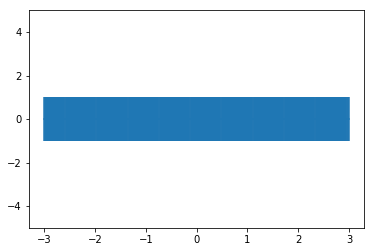

In [4]:
xpts = np.arange(-3, 3, step=0.01)
f, ax = plt.subplots(1)
ax.set_ylim(-5, 5)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=sigma_0, capsize=0)
plt.show()

In [5]:
x = [1.]
y = [np.random.normal(scale=sigma_0)]
print("x : {}, y : {}".format(x, y))

x : [1.0], y : [1.0671307341368117]


In [6]:

sigma_1 = exponential_cov(x, x, par1)
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, par1, sigma_1, y) for i in x_pred]

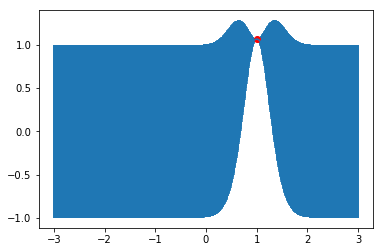

In [8]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.show()

In [9]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, par1)
y_more = np.random.multivariate_normal(mu, s)
y_more

array([ 1.05844066, -0.45374263,  0.07882741, -0.55996015, -0.66777359])

In [10]:
x += x_more
y += y_more.tolist()
sigma_new = exponential_cov(x, x, par1)
predictions = [predict(i, x, exponential_cov, par1, sigma_new, y) for i in x_pred]
y_pred, sigmas = np.transpose(predictions)

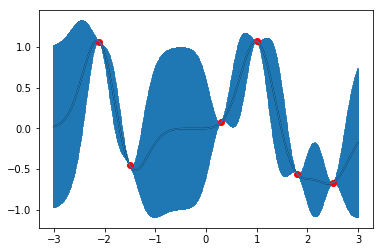

In [11]:
plt.plot(x_pred, y_pred, 'k-')
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.show()